# 1
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


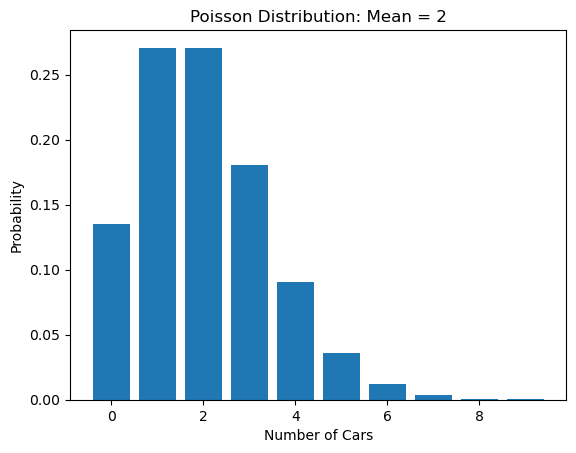

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Set up the parameters
mean = 2
x = np.arange(0, 10)

# Create the Poisson distribution
dist = poisson.pmf(x, mean)

# Plot the distribution
plt.bar(x, dist)
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.title('Poisson Distribution: Mean = 2')
plt.show()



What is the probability that no cars drive up in the noon hour? 

In [2]:
prob_zero_cars = poisson.pmf(0, mean)
prob_zero_cars

0.1353352832366127

What is the probability that 3 or more cars come through the drive through? 

In [3]:
prob_three_or_more_cars = 1 - poisson.cdf(2, mean)
prob_three_or_more_cars

0.3233235838169366

How likely is it that the drive through gets at least 1 car?

In [4]:
prob_at_least_one_car = 1 - prob_zero_cars
prob_at_least_one_car

0.8646647167633873

# 2
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:


In [54]:
#set mean and sd
mean = 3.0
sd = .3

In [55]:
univ_dist = stats.norm(mean, sd)
univ_dist

What grade point average is required to be in the top 5% of the graduating class?


In [56]:
univ_dist.isf(.05)

3.4934560880854417

What GPA constitutes the bottom 15% of the class?


In [57]:
univ_dist.ppf(.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [58]:

#zscores
z_20 = stats.norm.ppf(0.2)
z_30 = stats.norm.ppf(0.3)

#gpa lower and upper bounds of decile
x_20 = mean + z_20 * sd
x_30 = mean + z_30 * sd
gpa_range = (x_20, x_30)

print("Third decile range:", gpa_range)

if 2.8 >= gpa_range[0] and 2.8 <= gpa_range[1]:
    print('Yes, qualifies')
else:
    print("No, doesn't qualify")


Third decile range: (2.7475136299281258, 2.842679846187588)
Yes, qualifies


If I have a GPA of 3.5, what percentile am I in?

In [59]:
#z-score for a GPA of 3.5
x = 3.5
z = (x - mean) / sd

# Calculate percentile from z-score
percentile = stats.norm.cdf(z)

percentile

0.9522096477271853

# 3
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [60]:
from scipy.stats import binom

n = 4326  # number of trials/visitors
p = 0.02  # probability of success/click-through rate
x = 97  # number of successes/click-throughs

# we want to know how many people n with an average 2% click through avg, will produce 97 successes?
stats.binom(n, p).sf(x)

0.11781530585978467

# 4
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [64]:
#use the compliment rule, P(A)=(1-0.01)^60
#P(at least one correct) = 1 - P(none correct)
#P(at least one correct) = 
1 - (1 - 0.01)**60


0.4528433576092388

In [65]:
# number of trials
n1 = 60

# probability of success
p1 = 0.01

# probability of getting at least one success in the first 60 trials
prob_of_at= stats.binom(n1, p1).sf(0)
prob_of_at

0.45284335760923855

In [66]:
prob_of_at= stats.binom(n1, p1).sf(1)
prob_of_at

0.12123327131180728

# 5

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [67]:
import scipy.stats as stats

n_students = 22 * 3 
p_visit = 0.9
n_visitors = round(n_students * p_visit) 
p_clean = 0.03 


In [68]:
# probability that the break area gets cleaned each day
p_clean_day = stats.binom(n_visitors, p_clean).sf(0) 
p_clean_day

0.8342199288437352

In [69]:
# probability that the break area does not get cleaned for two days
p_not_clean_2days = stats.binom(2, 1 - p_clean_day).pmf(2) 
p_not_clean_2days

0.027483031992576224

In [70]:
# probability that the break area does not get cleaned for a week
p_not_clean_week = stats.binom(5, 1 - p_clean_day).pmf(5)
p_not_clean_week

0.00012521651388091348

# 6

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [71]:
mean = 15
std_dev = 3
total_time = 60 - 15 # Total time for lunch break minus time spent in line and waiting for food

# Convert to a standard normal distribution
z_score = (total_time - (12 * mean)) / (12 * std_dev)

# Calculate the probability
probability = stats.norm.sf(z_score)

probability


0.9999115827147992

# 7
Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [72]:
import pandas as pd
import numpy as np
from env import host_name, user, password

In [73]:
def get_db_url(database):
    url = f'mysql+pymysql://{user}:{password}@{host_name}/{database}'
    return url

In [74]:
url = get_db_url('employees')

In [75]:
salaries_df = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', url)
salaries_df

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [79]:
mean_salary = round(salaries_df['salary'].mean(),2)
mean_salary

72012.24

In [80]:
std_salary = round(salaries_df['salary'].std(),2)
std_salary

17310.0

In [81]:
# Calculate the z-score for 60,000
z_score = (60000 - mean_salary) / std_salary

# Calculate the probability of earning less than 60,000
p_less_than_60k = stats.norm.cdf(z_score)

# Convert the probability to a percentage
percent_less_than_60k = round(p_less_than_60k * 100, 2)

percent_less_than_60k

24.39

In [82]:
#compaired to actual values from db
actual_percent_less_than_60k = round((salaries_df[salaries_df['salary'] < 60000]['salary'].count() / salaries_df['salary'].count()) * 100, 2)
actual_percent_less_than_60k

27.06

In [95]:
z_score2 = (95000 - mean_salary) / std_salary

# Calculate the probability of earning more than 95,000
p_more_than_95k = stats.norm.sf(z_score2)

# Convert the probability to a percentage
percent_more_than_95k = round(p_more_than_95k * 100, 2)
percent_more_than_95k

9.21

In [91]:
#compaired to actual values from db
actual_percent_more_than_95k = round((salaries_df[salaries_df['salary'] > 95000]['salary'].count() / salaries_df['salary'].count()) * 100, 2)
actual_percent_more_than_95k

10.86

In [93]:
# between 65K and 80K
z3 = (65000 - mean_salary) / std_salary
z4 = (80000 - mean_salary) / std_salary

between_65_85 = stats.norm.cdf(z4) - stats.norm.cdf(z3)
between_65_85 


0.33506048676360467

In [94]:
#The ppf method takes a probability value as its first argument ( 0.95 for the top 5% of employees) 
#the mean and standard deviation of the normal distribution as its loc and scale arguments 

top_5_percent_salary = round(stats.norm.ppf(0.95, mean_salary, std_salary),2)
top_5_percent_salary

100484.66